# Пункт 2 - Исследование данных на качество
В этом ноутбуке представлено решение задач 1-5 из второго путнкта. Итоговый результат обработанных данных будет сохранен в файле `processed_data.csv`

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

# Загрузка сырых данных

In [2]:
data = pd.read_csv('/content/raw_data.csv')
data.head()

,Развитие ОПП,ХБП,"Возраст,",Пол,"ГБ,",Сахарный диабет,"Стенокардия,",Инфаркт миокарда,Мерцательная аритмия,Желудочковая экстрасистолия,...,Толщина паренхимы почек,АИК,Количество шунтов,Длительность операции,Длительность АИК,Время пережатия аорты,Объем кровопотерии,Объем гемотрансфузии,Объем инфузий,Диурез
0,нет,Стадия C1-C2,67,1,1,1,1,1,0,0,...,14,0,1,150,0,0,200,830,2900,900
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,15,1,4,235,143,121,600,640,900,800
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,17,0,1,210,0,0,250,0,1800,500
3,нет,Стадия C1-C2,62,1,1,0,1,1,1,0,...,16,1,3,210,71,43,500,1283,1700,1700
4,есть,Стадия C1-C2,55,1,1,1,1,1,0,0,...,15,1,3,265,116,74,500,1560,1800,1300


# Задание 1 - Привести формат названий столбцов к PEP-8 формату
Создадим список правильных названий полей из ТЗ

In [3]:
actual_columns = [
    'Развитие ОПП',
    'ХБП',
    'Возраст',
    'Пол',
    'ГБ',
    'Сахарный диабет',
    'Стенокардия',
    'Инфаркт миокарда',
    'Мерцательная аритмия',
    'Желудочковая экстрасистолия',
    'А-В блокада',
    'Блокада ножек пучка Гиса',
    'САД',
    'ДАД',
    'Креатинин крови',
    'Мочевина',
    'СКФ расч',
    'Калий',
    'Натрий',
    'Хлориды',
    'Кальций',
    'РН',
    'ВЕ',
    'НСО3',
    'РО2',
    'РСО2',
    'Оксигем',
    'Общ.СО2',
    'Гемоглобин',
    'Лейкоциты',
    'Тромбоциты',
    'ЧСС',
    'Интервал Q-T',
    'QRS',
    'ХСН',
    'НК',
    'Масса миокарда ЛЖ',
    'Фракция изгнания',
    'АР',
    'Давл. в ЛА',
    'УО',
    'МО',
    'ДД ЛЖ',
    'СД ЛЖ',
    'КДО',
    'КСО',
    'КДР правого желудочка',
    'Размер левого предсердия',
    'АлАт',
    'АсАт',
    'Холестерин',
    'Триглицериды',
    'ЛПОНП',
    'ЛПНП',
    'Общий белок',
    'АЧТВ',
    'ИМТ',
    'Толщина паренхимы почек',
    'АИК',
    'Количество шунтов',
    'Длительность операции',
    'Длительность АИК',
    'Время пережатия аорты',
    'Объем кровопотерии',
    'Объем гемотрансфузии',
    'Объем инфузий',
    'Диурез'
]

Переименуем и отформатируем в PEP-8 все поля

In [4]:
data.columns = actual_columns
data.columns

Index(['Развитие ОПП', 'ХБП', 'Возраст', 'Пол', 'ГБ', 'Сахарный диабет',
       'Стенокардия', 'Инфаркт миокарда', 'Мерцательная аритмия',
       'Желудочковая экстрасистолия', 'А-В блокада',
       'Блокада ножек пучка Гиса', 'САД', 'ДАД', 'Креатинин крови', 'Мочевина',
       'СКФ расч', 'Калий', 'Натрий', 'Хлориды', 'Кальций', 'РН', 'ВЕ', 'НСО3',
       'РО2', 'РСО2', 'Оксигем', 'Общ.СО2', 'Гемоглобин', 'Лейкоциты',
       'Тромбоциты', 'ЧСС', 'Интервал Q-T', 'QRS', 'ХСН', 'НК',
       'Масса миокарда ЛЖ', 'Фракция изгнания', 'АР', 'Давл. в ЛА', 'УО', 'МО',
       'ДД ЛЖ', 'СД ЛЖ', 'КДО', 'КСО', 'КДР правого желудочка',
       'Размер левого предсердия', 'АлАт', 'АсАт', 'Холестерин',
       'Триглицериды', 'ЛПОНП', 'ЛПНП', 'Общий белок', 'АЧТВ', 'ИМТ',
       'Толщина паренхимы почек', 'АИК', 'Количество шунтов',
       'Длительность операции', 'Длительность АИК', 'Время пережатия аорты',
       'Объем кровопотерии', 'Объем гемотрансфузии', 'Объем инфузий',
       'Диурез'],
      d

In [5]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head()

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,толщина_паренхимы_почек,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез
0,нет,Стадия C1-C2,67,1,1,1,1,1,0,0,...,14,0,1,150,0,0,200,830,2900,900
1,есть,Стадия C1-C2,69,1,1,0,1,0,0,0,...,15,1,4,235,143,121,600,640,900,800
2,нет,Пациенты без ХБП,50,1,1,0,1,1,0,0,...,17,0,1,210,0,0,250,0,1800,500
3,нет,Стадия C1-C2,62,1,1,0,1,1,1,0,...,16,1,3,210,71,43,500,1283,1700,1700
4,есть,Стадия C1-C2,55,1,1,1,1,1,0,0,...,15,1,3,265,116,74,500,1560,1800,1300


# Задание 2 -  Исследовать тип данных, привести данные к правильному типу, где это необходимо

Посмотрим на типы признаков

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   развитие_опп                 200 non-null    object
 1   хбп                          200 non-null    object
 2   возраст                      200 non-null    int64 
 3   пол                          200 non-null    int64 
 4   гб                           200 non-null    int64 
 5   сахарный_диабет              200 non-null    int64 
 6   стенокардия                  200 non-null    int64 
 7   инфаркт_миокарда             200 non-null    int64 
 8   мерцательная_аритмия         200 non-null    int64 
 9   желудочковая_экстрасистолия  200 non-null    int64 
 10  а-в_блокада                  200 non-null    int64 
 11  блокада_ножек_пучка_гиса     200 non-null    int64 
 12  сад                          200 non-null    int64 
 13  дад                          200 no

Рассмотрим признаки строкового типа на наличие числовых из ТЗ. А также отдельно создадим список числовых признаков для дальнейшей работы с ними

In [7]:
numerical_columns = [col for col in data.columns if data[col].dtype == 'int64']

In [8]:
categorial_columns = [col for col in data.columns if data[col].dtype == 'object']
categorial_columns

['развитие_опп',
 'хбп',
 'мочевина',
 'скф_расч',
 'калий',
 'натрий',
 'хлориды',
 'кальций',
 'рн',
 'ве',
 'нсо3',
 'ро2',
 'рсо2',
 'оксигем',
 'общ.со2',
 'гемоглобин',
 'лейкоциты',
 'чсс',
 'мо',
 'дд_лж',
 'сд_лж',
 'кдр_правого_желудочка',
 'размер_левого_предсердия',
 'холестерин',
 'триглицериды',
 'лпонп',
 'лпнп',
 'общий_белок',
 'ачтв',
 'имт',
 'толщина_паренхимы_почек']

Исходя из ТЗ выберем из нашего списка полей "categorial_columns" фактические числовые признаки

In [9]:
wrong_categ_columns = [
    'мочевина',
    'скф_расч',
    'калий',
    'натрий',
    'хлориды',
    'кальций',
    'рн',
    'ве',
    'нсо3',
    'ро2',
    'рсо2',
    'оксигем',
    'общ.со2',
    'гемоглобин',
    'лейкоциты',
    'чсс',
    'мо',
    'дд_лж',
    'сд_лж',
    'кдр_правого_желудочка',
    'размер_левого_предсердия',
    'холестерин',
    'триглицериды',
    'лпонп',
    'лпнп',
    'общий_белок',
    'ачтв',
    'имт',
    'толщина_паренхимы_почек'
]

Посмотрим на эти признаки для дальнейшего форматироваания. Для отображения всех признаков выведем таблицу по половинкам

In [10]:
# 1-ая половина
data[wrong_categ_columns[:len(wrong_categ_columns)//2]].head()

,мочевина,скф_расч,калий,натрий,хлориды,кальций,рн,ве,нсо3,ро2,рсо2,оксигем,общ.со2,гемоглобин
0,"8,2",86,"4,51",143,100,"0,99","7,42","-2,1","21,4","149,4","33,4",99,"22,4",115
1,"6,2",63,"4,92",140,NaN,"1,02","7,49","1,5","23,9",128,"31,6","98,8","24,9",134
2,"5,5",105,"4,5",140,NaN,"0,96","7,37","-4,8","19,5",88,34,"96,6","20,5",156
3,"5,9",68,"4,68",147,102,"0,94","7,44","-1,1","22,2",192,"33,4","99,4","23,2",175
4,"5,3",95,"4,48",141,103,"0,85","7,41","0,8","25,7",271,"41,7","99,6",26,134


In [11]:
# 2-ая половина
data[wrong_categ_columns[len(wrong_categ_columns)//2:]].head()

,лейкоциты,чсс,мо,дд_лж,сд_лж,кдр_правого_желудочка,размер_левого_предсердия,холестерин,триглицериды,лпонп,лпнп,общий_белок,ачтв,имт,толщина_паренхимы_почек
0,"7,47",61,"6,78","5,8","3,6","2,7","4,2","2,47","0,97","0,44","0,9",76,34,30,14
1,"5,5",66,"5,82",6,"4,3","2,6","3,7","5,73","2,12","1,42","0,84",75,31,29,15
2,8,67,"4,26",5,"3,4",3,4,"6,22","1,7","1,13","0,78",70,33,30,17
3,"6,8",94,"6,54","5,7","3,5","2,2","3,8","4,22","1,25","1,12","0,57",83,33,30,16
4,"10,7",81,"4,98","5,1","3,2","2,3","4,2","3,52","2,52","0,69","1,15",74,31,33,15


Преобразуем признаки в числовые

Строки были преобразованы рассматривая следующие причины:
1. Тип объекта - число
2. Тип объекта - строка в виде числа с запятой
3. Тип объекта - строка в виде целого числа либо числа с точкой
4. Другие символы в объекте

In [12]:
def convert_to_number(x):
    if isinstance(x, int) or isinstance(x, float):
        return x
    elif ',' in str(x):
        return float(x.replace(',', '.'))
    elif '.' in str(x) or x.replace('-', '').isdigit():
        return float(x)
    elif not x.isdigit():
        return x


for column in wrong_categ_columns:
    data[column] = data[column].apply(lambda x: convert_to_number(x))

Посмотрим на результаты

In [13]:
data[wrong_categ_columns[:len(wrong_categ_columns)//2]].head()

,мочевина,скф_расч,калий,натрий,хлориды,кальций,рн,ве,нсо3,ро2,рсо2,оксигем,общ.со2,гемоглобин
0,8.2,86.0,4.51,143.0,100.0,0.99,7.42,-2.1,21.4,149.4,33.4,99.0,22.4,115.0
1,6.2,63.0,4.92,140.0,NaN,1.02,7.49,1.5,23.9,128.0,31.6,98.8,24.9,134.0
2,5.5,105.0,4.50,140.0,NaN,0.96,7.37,-4.8,19.5,88.0,34.0,96.6,20.5,156.0
3,5.9,68.0,4.68,147.0,102.0,0.94,7.44,-1.1,22.2,192.0,33.4,99.4,23.2,175.0
4,5.3,95.0,4.48,141.0,103.0,0.85,7.41,0.8,25.7,271.0,41.7,99.6,26.0,134.0


In [14]:
data[wrong_categ_columns[len(wrong_categ_columns)//2:]].head()

,лейкоциты,чсс,мо,дд_лж,сд_лж,кдр_правого_желудочка,размер_левого_предсердия,холестерин,триглицериды,лпонп,лпнп,общий_белок,ачтв,имт,толщина_паренхимы_почек
0,7.47,61.0,6.78,5.8,3.6,2.7,4.2,2.47,0.97,0.44,0.90,76.0,34.0,30.0,14.0
1,5.50,66.0,5.82,6.0,4.3,2.6,3.7,5.73,2.12,1.42,0.84,75.0,31.0,29.0,15.0
2,8.00,67.0,4.26,5.0,3.4,3.0,4.0,6.22,1.70,1.13,0.78,70.0,33.0,30.0,17.0
3,6.80,94.0,6.54,5.7,3.5,2.2,3.8,4.22,1.25,1.12,0.57,83.0,33.0,30.0,16.0
4,10.70,81.0,4.98,5.1,3.2,2.3,4.2,3.52,2.52,0.69,1.15,74.0,31.0,33.0,15.0


Для проверки результатов еще раз посмотрим на числовые признаки на наличие строк. Для этого выведем названия признаков, в которых есть строки

In [15]:
# Добавляем в числовые признаки наши обработанные фичи
numerical_columns += wrong_categ_columns

for col in numerical_columns:
    if data[col].dtype == 'object':
        print(col)

чсс


Заметили, что в "чсс" есть строки, посмотрим на них

In [16]:
for value in data['чсс']:
    if isinstance(value, str):
        print(value)

7o


Заменяем опечатку 7о на 70

In [17]:
data['чсс'] = data['чсс'].replace('7o', 70)
data['чсс'].dtypes == 'object'

False

# Задание 3 - Обработка аномальных значений (абсурдных или физиологически невозможных)

Рассмотрим категориальные признаки на наличие ошибок

In [18]:
# Функция для вывода категорий признака
def categories_count(columns):
    cats = ''
    for col in columns:
        cats += f'{data[col].value_counts()}\n'
    return cats

In [19]:
categ_columns = [col for col in data.columns if data[col].dtype == 'object']
print(categories_count(categ_columns))

есть    125
нет      75
Name: развитие_опп, dtype: int64
Стадия C1-C2        94
Пациенты без ХБП    92
Стадия С3           14
Name: хбп, dtype: int64



Проверим бинарные признаки на наличие лишних категорий

In [20]:
binary_columns = [
    'пол',
    'гб',
    'сахарный_диабет',
    'стенокардия',
    'инфаркт_миокарда',
    'мерцательная_аритмия',
    'желудочковая_экстрасистолия',
    'а-в_блокада',
    'блокада_ножек_пучка_гиса',
    'хсн',
    'нк',
    'ар',
    'аик'
]

In [21]:
print(categories_count(binary_columns))

1    183
0     17
Name: пол, dtype: int64
1    177
0     23
Name: гб, dtype: int64
0    134
1     66
Name: сахарный_диабет, dtype: int64
1    192
0      8
Name: стенокардия, dtype: int64
1    132
0     68
Name: инфаркт_миокарда, dtype: int64
0    149
1     51
Name: мерцательная_аритмия, dtype: int64
0    171
1     29
Name: желудочковая_экстрасистолия, dtype: int64
0    182
1     18
Name: а-в_блокада, dtype: int64
0    168
1     32
Name: блокада_ножек_пучка_гиса, dtype: int64
1    195
0      5
Name: хсн, dtype: int64
0    119
1     81
Name: нк, dtype: int64
0    134
1     66
Name: ар, dtype: int64
1    160
0     40
Name: аик, dtype: int64



## Выбросы

Исключим бинарные признаки из списка числовых

In [22]:
for col in binary_columns:
    numerical_columns.remove(col)

Для очистки выбросов используем технику межквартального размаха. IQR = 1.5 поскольку это поможет сохранить больше информации, исключая только явные выбросы, а не те, которые вызваны особенными условиями небольшой группы пациентов

In [23]:
# Очистка выбросов межквартильным размахом
def clean_outliers(col):
    median = data[col].median()
    Q3, Q1 = np.percentile(data[col], [75, 25])
    IQR = Q3 - Q1
    high = median + 1.5 * IQR
    low = median - 1.5 * IQR
    return data[col].apply(lambda x: median if x > high or x < low else x)

Выведем гистограммы распределений признаков

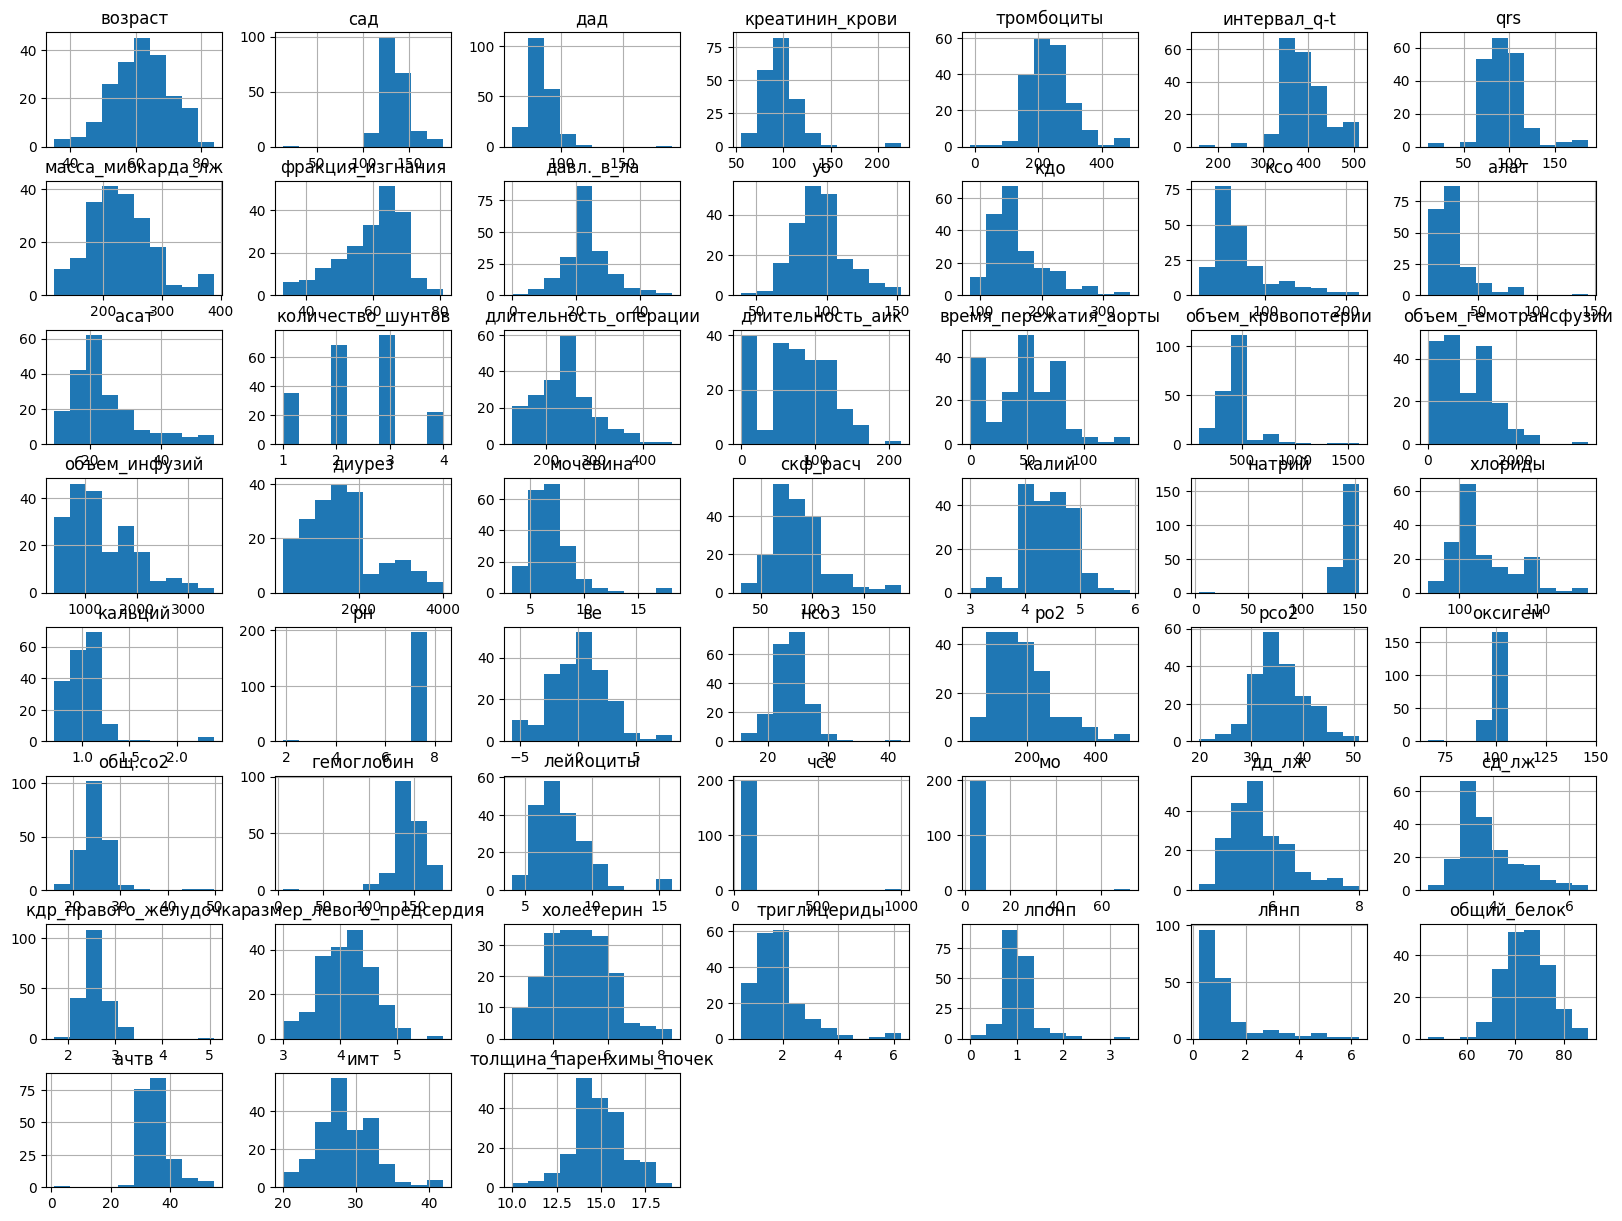

In [24]:
data.hist(column=numerical_columns, figsize=(20, 15))
None

Избавляемся от выбросов в признаках, за исключением возраста и количества, так как у них отсутствуют аномальные значения, исходя из гистограммы

In [25]:
for col in numerical_columns:
    if col != 'возраст' and col != 'количество_шунтов':
        data[col] = clean_outliers(col)

Проверим результаты с помощью ящиков с усами

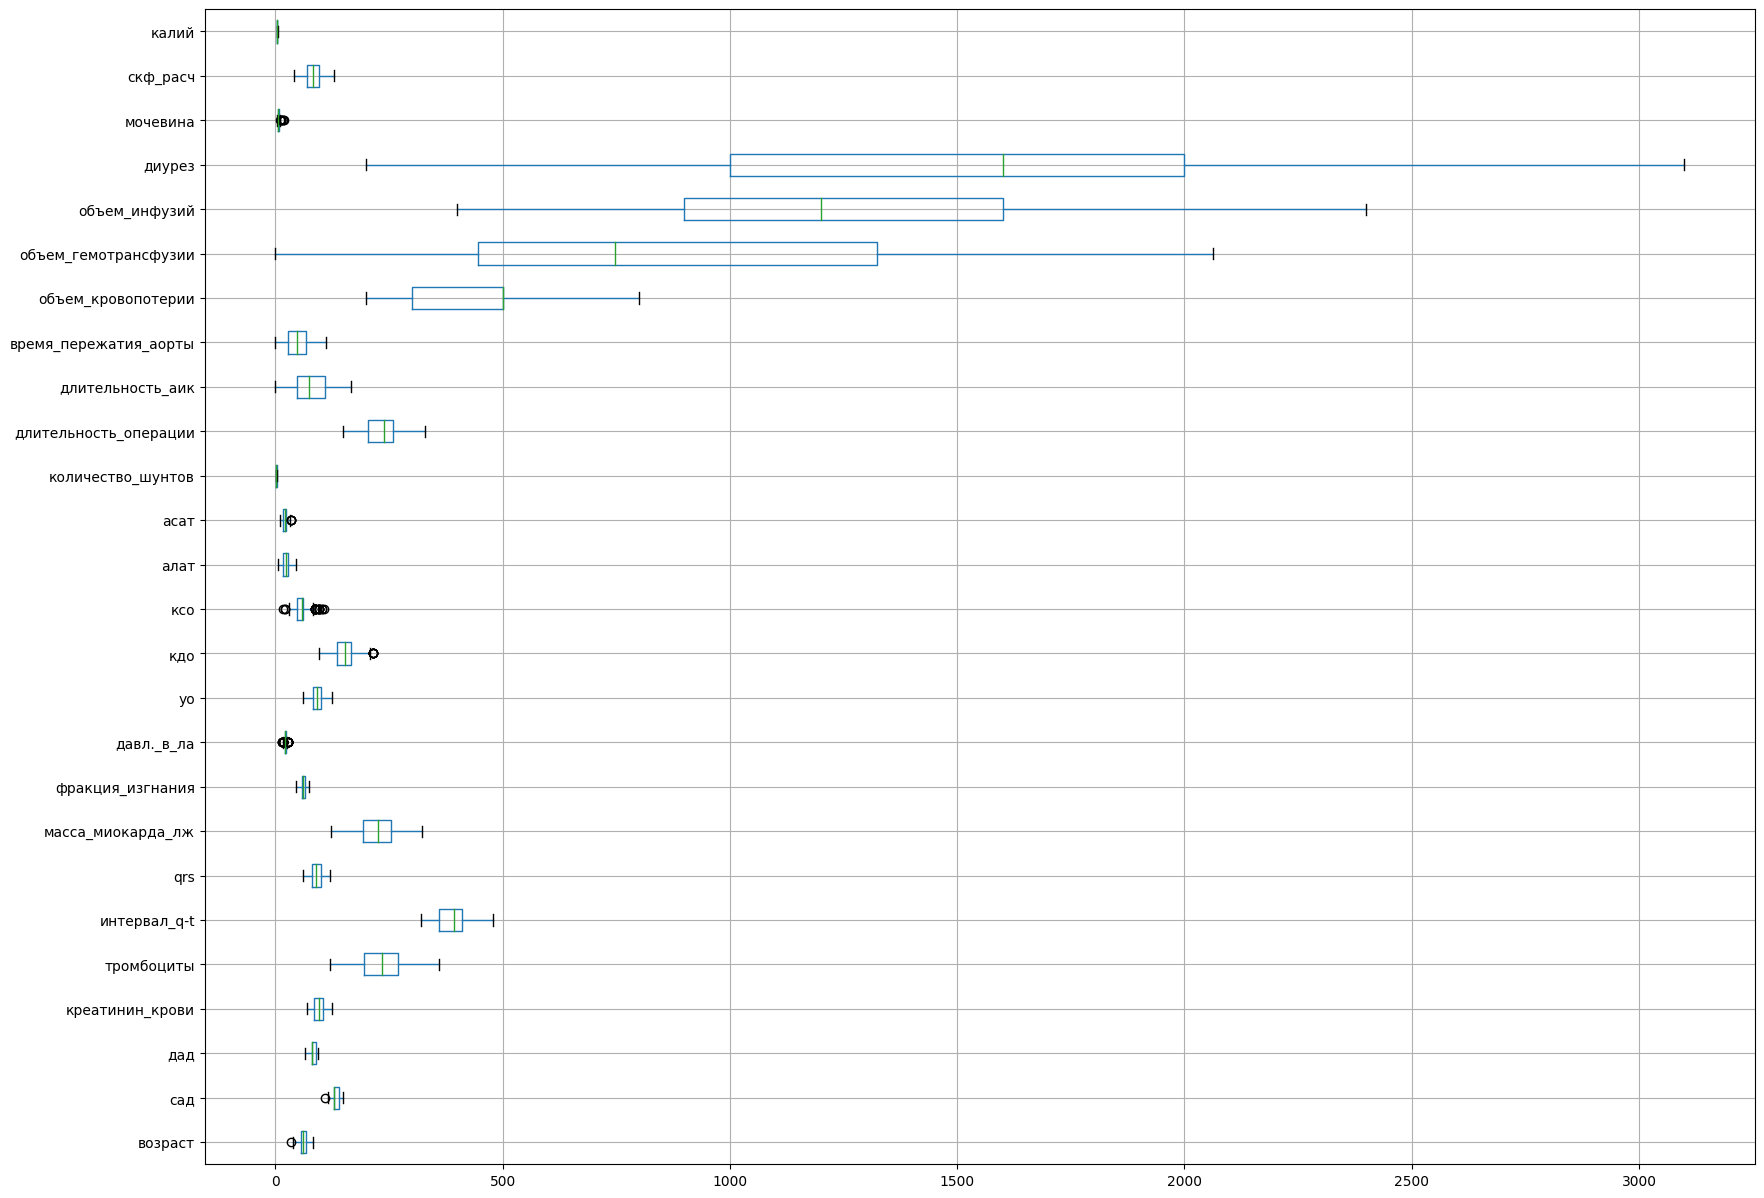

In [26]:
data.boxplot(column=numerical_columns[:len(numerical_columns)//2], vert=False, figsize=(20, 15))
None

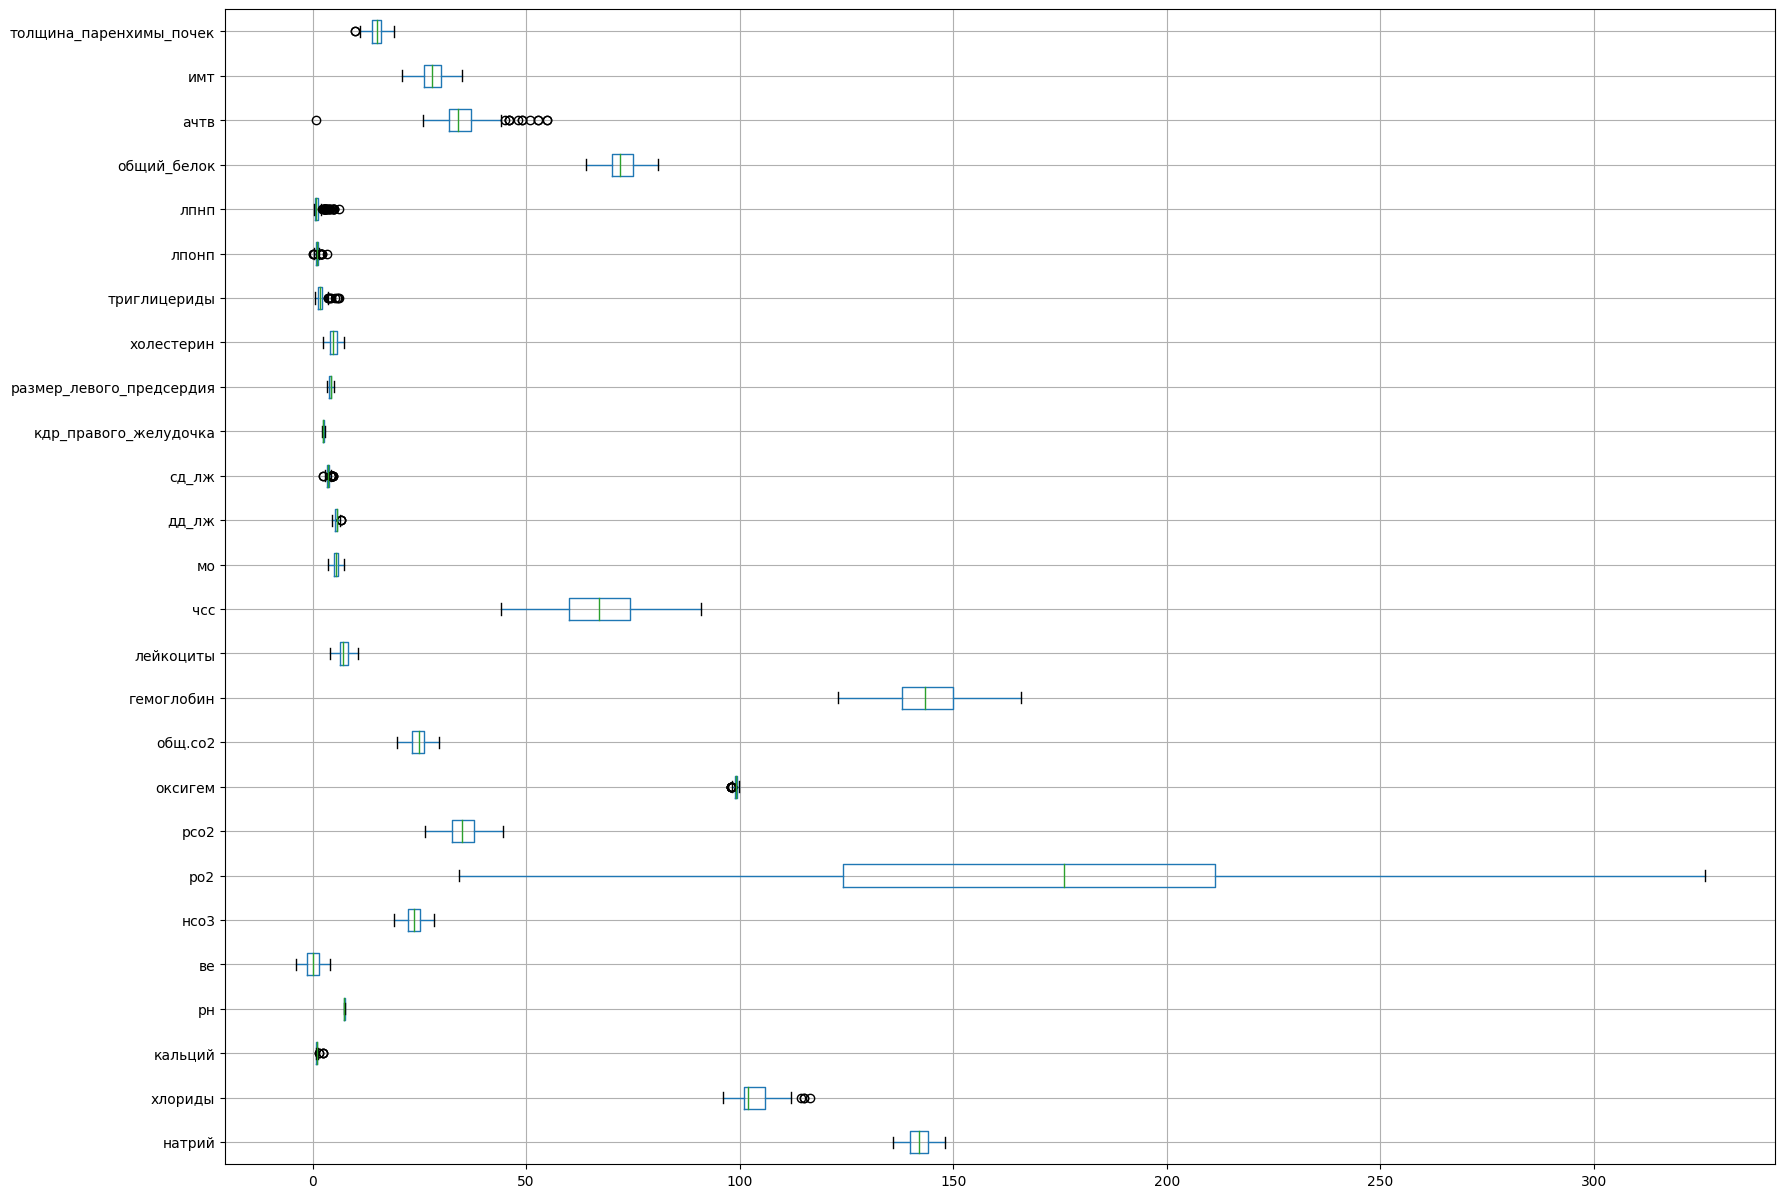

In [27]:
data.boxplot(column=numerical_columns[len(numerical_columns)//2:], vert=False, figsize=(20, 15))
None

В признаке "ачтв" присутствует огромный выброс снизу со значением 0, который не может быть у живого человека. Заменим его на медиану

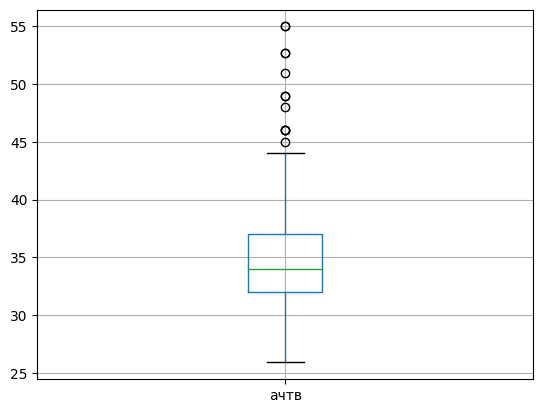

In [28]:
data['ачтв'] = data['ачтв'].replace(data['ачтв'].min(), data['ачтв'].median())
data[['ачтв']].boxplot()
None

# Задание 4 - Обработать пропуски в данных, обосновать принятое решение по пропускам


Найдем признаки, в которых есть пропуски

In [29]:
for col in data.columns:
    if data[col].isna().sum() > 0:
        print(f"{col} - {data[col].isna().sum()}")

мочевина - 1
хлориды - 23
кальций - 19
триглицериды - 6
лпонп - 10
лпнп - 9
ачтв - 3
толщина_паренхимы_почек - 4


Создадим функцию для дальнейшего заполнения пропусков медианой, используя SimpleImputer

In [30]:
# Распределение признака
def distribution_info(column):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7,4))
    sns.histplot(data, x=column, bins=20, kde=True, ax=axs[0])
    sns.boxplot(data, y=column, ax=axs[1])
    plt.suptitle(f"Распределение признака '{column}'", fontsize=16, y=1.01)


# Заполнение пропусков медианой
def fill_median(col):
    imputer = SimpleImputer(strategy='median')
    data_to_impute = data[[col]]
    imputer.fit(data_to_impute)
    imputed_data = imputer.transform(data_to_impute)
    return imputed_data

## Мочевина

В данных присутствует всего 1 пропуск из 200 значений. Можем сделать вывод, что пропуск появился случайно. Критерий важен для прогноза, одного значения не исказит информацию

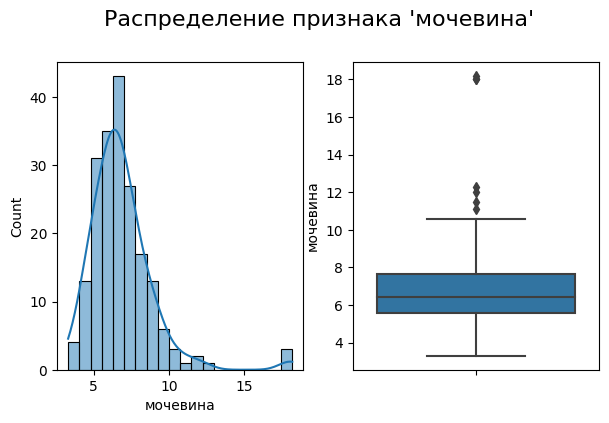

In [31]:
data.dropna(subset=['мочевина'], inplace=True)
distribution_info('мочевина')

## Хлориды

Поскольку пропущено 23 значений, нельзя точно сказать, что данные были потеряны из-за чистой случайности. Заполняем пропуски медианой, поскольку удаление пропусков приведет к потере свыше 10% информации

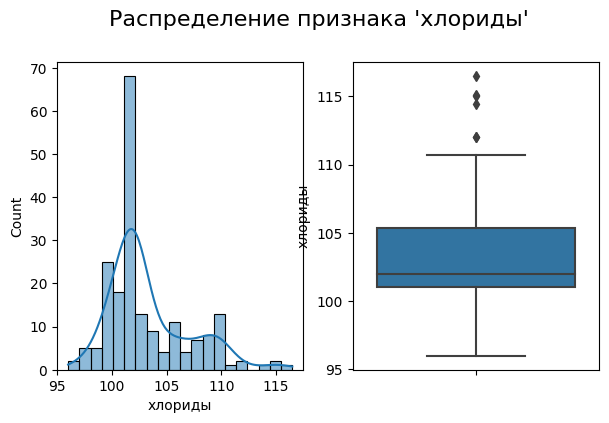

In [32]:
data['хлориды'] = fill_median('хлориды')
data['хлориды'].isna().sum()

distribution_info('хлориды')

## Кальций

Поскольку даных мало, то удаление 19 пропусков приведет к потере большой части информации, поэтому заполним медианой

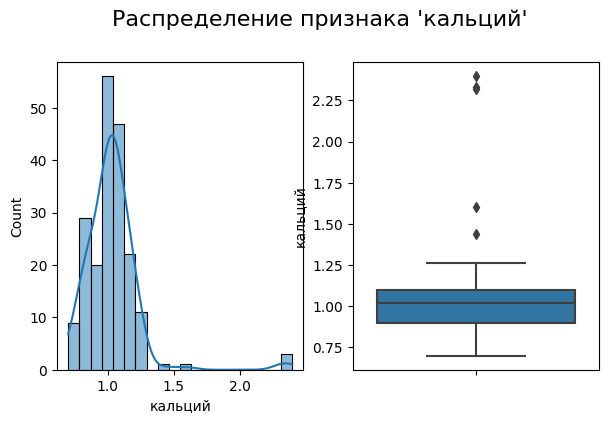

In [33]:
data['кальций'] = fill_median('кальций')
data['кальций'].isna().sum()

distribution_info('кальций')

## Триглицериды

Пропусков - 6. Поскольку признак не важен для предсказания, удаление небольшого количества пропусков не должно исказить данные

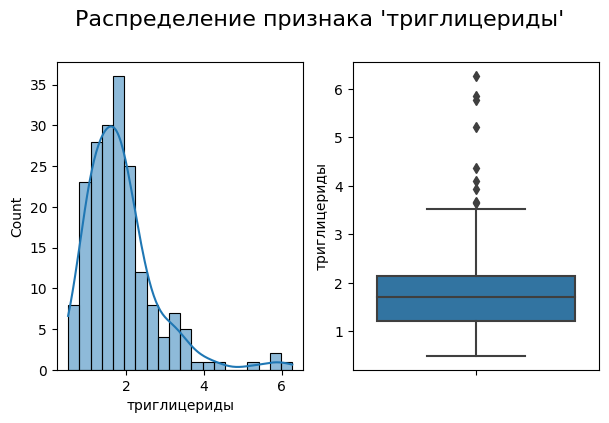

In [34]:
data.dropna(subset=['триглицериды'], inplace=True)
distribution_info('триглицериды')

## ЛПНП - липопротеины низкой плотности


Удаление 9 пропусков может способствовать потере важной части информации. Заполним значение медианой

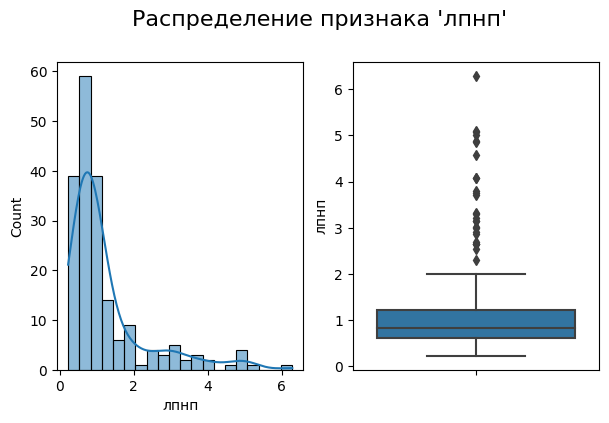

In [35]:
data['лпнп'] = fill_median('лпнп')
distribution_info('лпнп')

## ЛПОНП - липопротеины оочень о низкой плотности

Удаление 10 пропусков может привести к потере свыше 5% информации. Заполним медианой

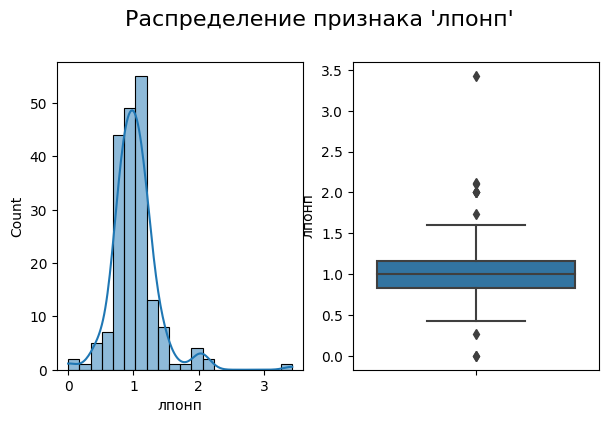

In [36]:
data['лпонп'] = fill_median('лпонп')
distribution_info('лпонп')

## АЧТВ - показатель свертываемости крови

Данные этого фактора относятся к данным результатов анализа, их отсутствие скорее всего может быть причиной случайной ошибкой, о чем говорит чрезвычайно малое количество пропусков (4/200). Удалим их

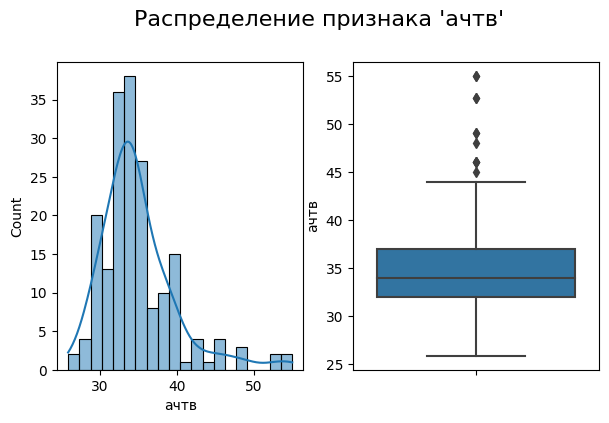

In [37]:
data.dropna(subset=['ачтв'], inplace=True)
distribution_info('ачтв')

## Толщина паренхимы почек

Количество пропусков может говорить о том, что данные были потеряны по случайности (4/200). Поскольку признак крайне важен для прогноза, заполнение пропусков медианой может исказить итоговую точность модели, поэтому удалим пропуски

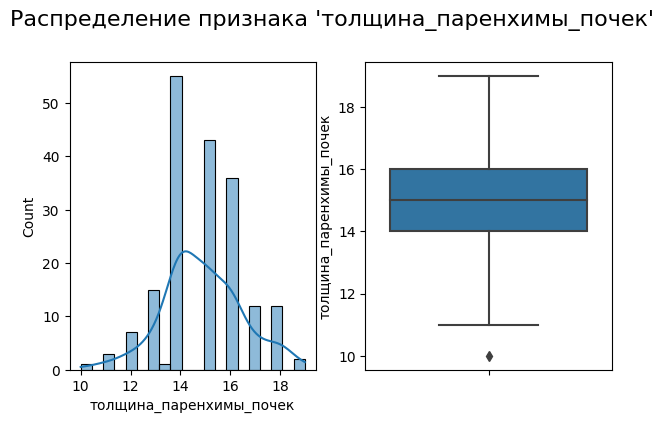

In [38]:
data.dropna(subset=['толщина_паренхимы_почек'], inplace=True)
distribution_info('толщина_паренхимы_почек')

Проверяем данные на пропуски

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 199
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   развитие_опп                 187 non-null    object 
 1   хбп                          187 non-null    object 
 2   возраст                      187 non-null    int64  
 3   пол                          187 non-null    int64  
 4   гб                           187 non-null    int64  
 5   сахарный_диабет              187 non-null    int64  
 6   стенокардия                  187 non-null    int64  
 7   инфаркт_миокарда             187 non-null    int64  
 8   мерцательная_аритмия         187 non-null    int64  
 9   желудочковая_экстрасистолия  187 non-null    int64  
 10  а-в_блокада                  187 non-null    int64  
 11  блокада_ножек_пучка_гиса     187 non-null    int64  
 12  сад                          187 non-null    float64
 13  дад                 

# Задание 5 - Проверить явные дубликаты

Посмотрим на дубликаты

In [47]:
duplicate_index = data[data.duplicated() == True]
duplicate_index

,развитие_опп,хбп,возраст,пол,гб,сахарный_диабет,стенокардия,инфаркт_миокарда,мерцательная_аритмия,желудочковая_экстрасистолия,...,толщина_паренхимы_почек,аик,количество_шунтов,длительность_операции,длительность_аик,время_пережатия_аорты,объем_кровопотерии,объем_гемотрансфузии,объем_инфузий,диурез
115,есть,Пациенты без ХБП,59,1,1,0,1,1,1,0,...,18.0,1,1,240.0,163.0,96.0,700.0,1148.0,1100.0,1300.0


Был найден только 1 дубликат с индексом 115. Удалим его

In [48]:
duplicate_index = duplicate_index.index[0]

data = data.drop(index=duplicate_index, axis=1)
data.shape

(186, 67)

# Сохранение результатов

In [50]:
data.to_csv('processed_data.csv', index=False, encoding='cp1251')